# Rice Diseases are classified using CNN with Tensorflow

[DATA](https://www.kaggle.com/competitions/paddy-disease-classification/data)

In [14]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
# import train.csv
data = pd.read_csv('train.csv')
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
# check the shape of the data
data.shape

(10407, 4)

In [4]:
data['label'].unique().tolist()



['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [5]:
data['variety'].unique().tolist()


['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [6]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

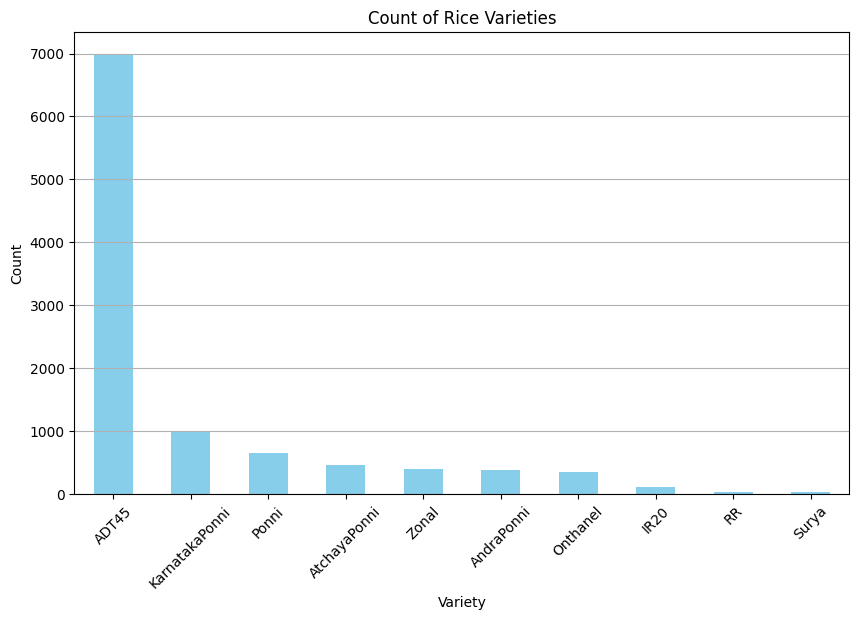

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each variety
variety_counts = data['variety'].value_counts()

# Plotting the data count based on variety name
plt.figure(figsize=(10, 6))
variety_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Rice Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [8]:
# Import required libraries
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the correct path to your images folder
IMAGES_PATH = r'E:\rice prediction\train_images'  # Your provided path

# Set up the figure
plt.figure(figsize=(15, 10))

# Get unique labels
unique_labels = data['label'].unique()

# Display one image for each disease class
for idx, label in enumerate(unique_labels[:9], 1):
    # Get first image_id for this label
    image_id = data[data['label'] == label]['image_id'].iloc[0]
    
    # Let's print the full path to debug
    img_path = os.path.join(IMAGES_PATH, image_id)
    print(f"Trying to open: {img_path}")  # This will help us see what path is being used
    
    try:
        img = Image.open(img_path)
        
        # Add subplot
        plt.subplot(3, 3, idx)
        plt.imshow(img)
        plt.title(label.replace('_', ' ').title(), fontsize=8)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Could not find image: {img_path}")

plt.suptitle('Sample Images of Different Rice Diseases', fontsize=14)
plt.tight_layout()
plt.show()

Trying to open: E:\rice prediction\train_images\100330.jpg
Could not find image: E:\rice prediction\train_images\100330.jpg
Trying to open: E:\rice prediction\train_images\100553.jpg
Could not find image: E:\rice prediction\train_images\100553.jpg
Trying to open: E:\rice prediction\train_images\100068.jpg
Could not find image: E:\rice prediction\train_images\100068.jpg
Trying to open: E:\rice prediction\train_images\100373.jpg
Could not find image: E:\rice prediction\train_images\100373.jpg
Trying to open: E:\rice prediction\train_images\100608.jpg
Could not find image: E:\rice prediction\train_images\100608.jpg
Trying to open: E:\rice prediction\train_images\101165.jpg
Could not find image: E:\rice prediction\train_images\101165.jpg
Trying to open: E:\rice prediction\train_images\100517.jpg
Could not find image: E:\rice prediction\train_images\100517.jpg
Trying to open: E:\rice prediction\train_images\100316.jpg
Could not find image: E:\rice prediction\train_images\100316.jpg
Trying t

<Figure size 1500x1000 with 0 Axes>

In [9]:
# Get 5 image names with 'normal' label
normal_images = data[data['label'] == 'normal']['image_id'].head()
print("5 images with 'normal' label:")
for img in normal_images:
    print(img)

5 images with 'normal' label:
100007.jpg
100025.jpg
100135.jpg
100165.jpg
100171.jpg


In [10]:
# Get 5 image names with 'dead_heart' label
dead_heart_images = data[data['label'] == 'dead_heart']['image_id'].head()
print("\n5 images with 'dead_heart' label:")
for img in dead_heart_images:
    print(img)


5 images with 'dead_heart' label:
101165.jpg
102750.jpg
108367.jpg
109900.jpg
100222.jpg


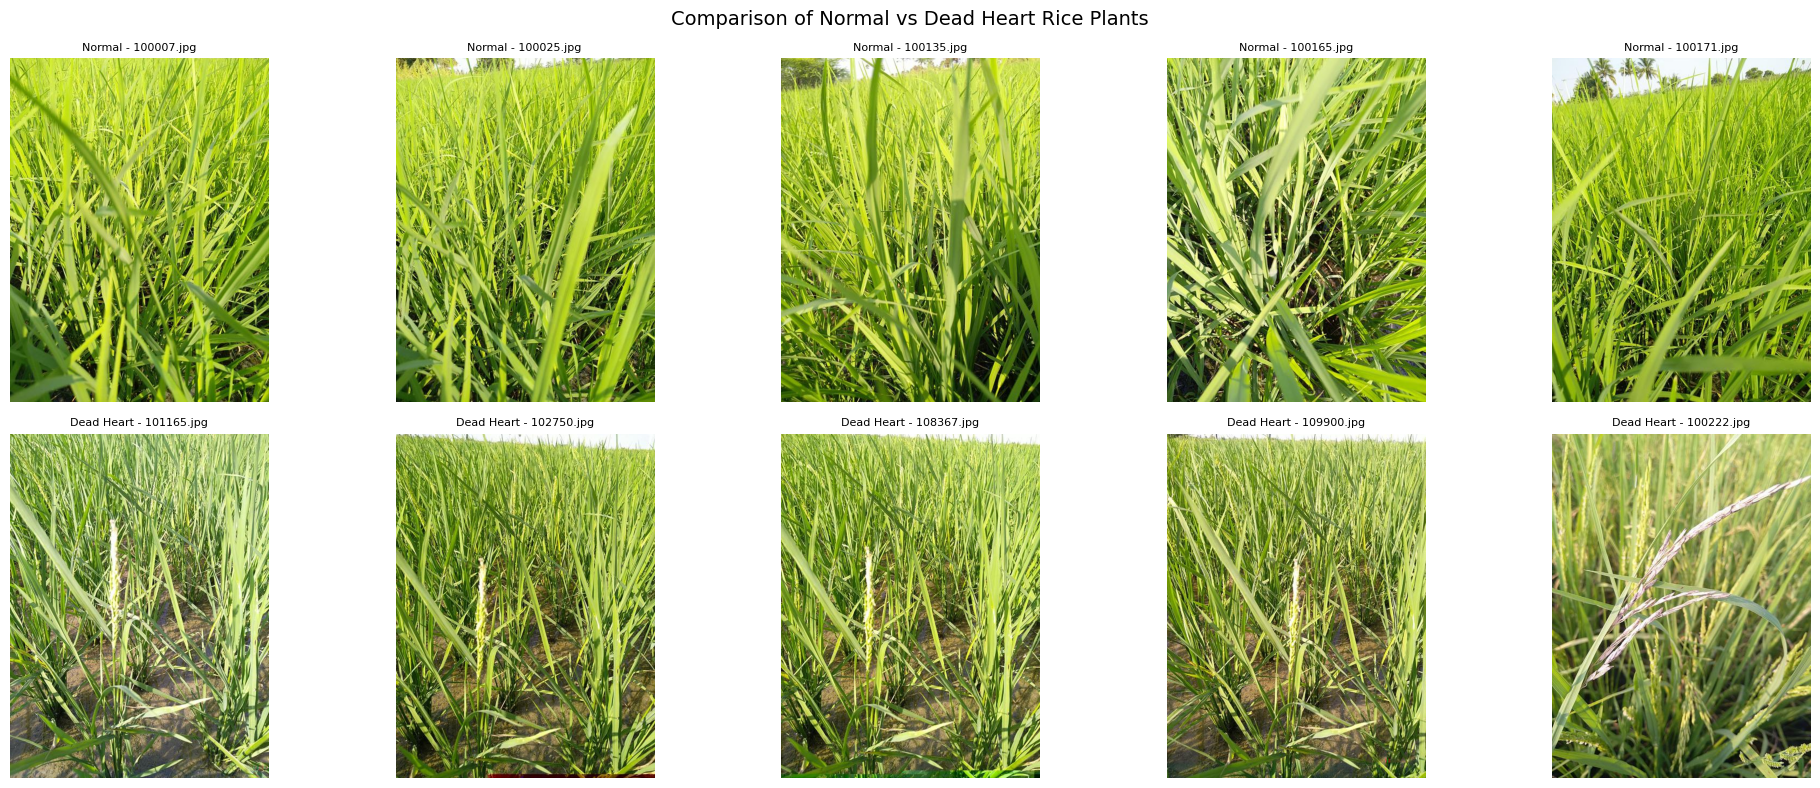

In [11]:
# Import required libraries
import os
from PIL import Image
import matplotlib.pyplot as plt

# Get the image names
normal_images = data[data['label'] == 'normal']['image_id'].head()
dead_heart_images = data[data['label'] == 'dead_heart']['image_id'].head()

# Define specific paths for each category
NORMAL_PATH = r'E:\rice prediction\train_images\normal'
DEAD_HEART_PATH = r'E:\rice prediction\train_images\dead_heart'

# Create a figure with 2 rows and 5 columns
plt.figure(figsize=(20, 8))

# Plot normal images
for idx, img_name in enumerate(normal_images, 1):
    img_path = os.path.join(NORMAL_PATH, img_name)
    try:
        img = Image.open(img_path)
        plt.subplot(2, 5, idx)
        plt.imshow(img)
        plt.title(f'Normal - {img_name}', fontsize=8)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Could not find image: {img_path}")

# Plot dead_heart images
for idx, img_name in enumerate(dead_heart_images, 6):
    img_path = os.path.join(DEAD_HEART_PATH, img_name)
    try:
        img = Image.open(img_path)
        plt.subplot(2, 5, idx)
        plt.imshow(img)
        plt.title(f'Dead Heart - {img_name}', fontsize=8)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Could not find image: {img_path}")

plt.suptitle('Comparison of Normal vs Dead Heart Rice Plants', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
label_encoder = LabelEncoder()
variety_encoder = LabelEncoder()

# Encode the labels and varieties directly in the same columns
data['label'] = label_encoder.fit_transform(data['label'])
data['variety'] = variety_encoder.fit_transform(data['variety'])

# Display the first few rows to verify the encoding
print(data[['label', 'variety']].head())


   label  variety
0      0        0
1      0        0
2      0        0
3      0        0
4      0        0


In [13]:
data.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


In [15]:
# deine the paramters
batch_size = 16
img_height = 224
img_width = 224

In [25]:
p = "E:/rice prediction/train_images"

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    p,
    validation_split=0.2,
    subset="training",  # Changed from "train" to "training"
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [28]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


In [29]:
normalization_layer= tf.keras.layers.Rescaling(1./255)

In [30]:
normalied_ds= train_ds.map(lambda x,y: (normalization_layer(x),y))
image_batch, labels_batch=next(iter(normalied_ds))
first_image = image_batch[0]

# notice the pixel values are now in [0,1]
print (np.min(first_image), np.max(first_image))

0.0 1.0


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# Since val_ds is not defined, we will skip its caching and prefetching

In [35]:
class_names = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']
class_name = len(class_names)
class_name

10

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Assuming class_names is defined
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
# fit the model
history = model.fit(train_ds, epochs=10)  # Removed validation_data=val_ds since val_ds is not defined


Epoch 1/10
521/521 [==============================] - 279s 534ms/step - loss: 5.0929 - accuracy: 0.2147
Epoch 2/10
521/521 [==============================] - 250s 480ms/step - loss: 1.9783 - accuracy: 0.2887
Epoch 3/10
521/521 [==============================] - 253s 485ms/step - loss: 1.7807 - accuracy: 0.3606
Epoch 4/10
521/521 [==============================] - 251s 482ms/step - loss: 1.5499 - accuracy: 0.4647
Epoch 5/10
521/521 [==============================] - 250s 479ms/step - loss: 1.2967 - accuracy: 0.5460
Epoch 6/10
521/521 [==============================] - 250s 479ms/step - loss: 1.0592 - accuracy: 0.6325
Epoch 7/10
521/521 [==============================] - 252s 483ms/step - loss: 0.8912 - accuracy: 0.6926
Epoch 8/10
521/521 [==============================] - 251s 483ms/step - loss: 0.8218 - accuracy: 0.7277
Epoch 9/10
521/521 [==============================] - 251s 482ms/step - loss: 0.7266 - accuracy: 0.7582
Epoch 10/10
521/521 [==============================] - 249s 478m

In [40]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(train_ds)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')


521/521 [==============================] - 46s 88ms/step - loss: 0.6798 - accuracy: 0.7814
Test accuracy: 0.7814, Test loss: 0.6798


In [51]:
# Get list of test images from directory
test_path = "E:/rice prediction/test_images"  # Updated to correct folder name
test_files = os.listdir(test_path)
test_files = [f for f in test_files if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a list to store processed images
test_images = []

# Process each image
for img_name in test_files:
    img_path = os.path.join(test_path, img_name)
    print(f"Processing: {img_name}")  # Added to monitor progress
    img = tf.keras.preprocessing.image.load_img(
        img_path, 
        target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    test_images.append(img_array)

# Convert to numpy array
test_images = np.array(test_images)

# Make predictions
predictions = model.predict(test_images)

# Create submission DataFrame
submission = pd.DataFrame(predictions, columns=class_names)
submission['image_id'] = test_files
submission = submission[['image_id'] + class_names]

# Save submission
submission.to_csv('submission.csv', index=False)

# Print summary
print(f"\nProcessed {len(test_files)} images")
print("Submission file created: submission.csv")

Processing: 200001.jpg
Processing: 200002.jpg
Processing: 200003.jpg
Processing: 200004.jpg
Processing: 200005.jpg
Processing: 200006.jpg
Processing: 200007.jpg
Processing: 200008.jpg
Processing: 200009.jpg
Processing: 200010.jpg
Processing: 200011.jpg
Processing: 200012.jpg
Processing: 200013.jpg
Processing: 200014.jpg
Processing: 200015.jpg
Processing: 200016.jpg
Processing: 200017.jpg
Processing: 200018.jpg
Processing: 200019.jpg
Processing: 200020.jpg
Processing: 200021.jpg
Processing: 200022.jpg
Processing: 200023.jpg
Processing: 200024.jpg
Processing: 200025.jpg
Processing: 200026.jpg
Processing: 200027.jpg
Processing: 200028.jpg
Processing: 200029.jpg
Processing: 200030.jpg
Processing: 200031.jpg
Processing: 200032.jpg
Processing: 200033.jpg
Processing: 200034.jpg
Processing: 200035.jpg
Processing: 200036.jpg
Processing: 200037.jpg
Processing: 200038.jpg
Processing: 200039.jpg
Processing: 200040.jpg
Processing: 200041.jpg
Processing: 200042.jpg
Processing: 200043.jpg
Processing:

## Observations:
1. This data has 10407 rows and 4 columns
2. This data has 10 unique disease classes
3. And also have 10 varities o RICE
4. The min age of rice is 45 and max is 82 and avg is 64
5. ADT45 is the most common variety inside the training data